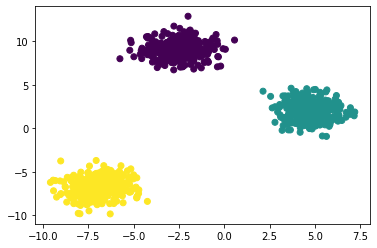

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

np.random.seed(0)

#### Data Generation ####

n_samples = 1000
random_state = 42
# blobs with varied variances
varied= datasets.make_blobs(n_samples=n_samples,
                             
                             random_state=random_state)
x,y=varied
x1=x[:,0]
x2=x[:,1]
plt.scatter(x1,x2,c=y)

#figure = plt.figure()
#axis = figure.add_subplot(1, 3, 1)
#axis.scatter(x1,x2,c=y)

In [2]:
#### Csv Generation #####
csv=np.array(x)
np.savetxt("labels.csv", csv, delimiter=",")

In [3]:
df=np.genfromtxt('labels.csv', delimiter=",")

In [4]:
import math 
x1=df[:,0]
x2=df[:,1]
def kernel(x,y,col1_mean,col2_mean,sigma_x,sigma_y,p):
    
    eq = pow(((x-col1_mean)/sigma_x),2)-2*p*((x-col1_mean)/sigma_x)*((y-col2_mean)/sigma_y)+pow(((y-col2_mean)/sigma_y),2) 
   
    denominator = 2*np.pi*sigma_x*sigma_y*math.sqrt(1-pow(p,2))
    
    numerator = math.exp((-1/(2*(1-pow(p,2))))*eq)
    final= numerator/denominator
    return final


In [5]:
#### Creating density field ####
import statistics
def denclue():
    total_probability=[]
    total=len(df)
    for row in range(len(df)):
        res=0
        for col in range(len(df)):
            sigma_x=0.4
            sigma_y=0.4
            p=0.0
            res+=kernel(x1[row],x2[row],x1[col],x2[col],sigma_x,sigma_y,p)
        prob=res/total
        total_probability.append(prob)
        
    return total_probability         
den=denclue()        

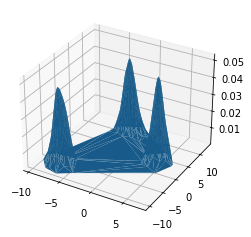

In [10]:
fig = plt.figure()
axis = fig.add_subplot(projection='3d')
axis.plot_trisurf(df[:,0],df[:,1],den)

#axis = figure.add_subplot(1, 3, 2, projection='3d')
#axis.plot_trisurf(df[:,0],df[:,1],den)

In [12]:
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import NearestNDInterpolator

x1=df[:,0]
x2=df[:,1]
inter = LinearNDInterpolator(list(zip(x1,x2)),den,fill_value=0)
# list_x=[]
# list_y=[]
def hill_climb(interpolator,x,y,prev_x, prev_y, h, alpha):

    while(1):
        ################
        
        dpdx= (interpolator(x+h,y)-interpolator(x,y))/h
        dpdy= (interpolator(x,y+h)-interpolator(x,y))/h
        
        current_x= x+(alpha*(dpdx))
        current_y= y+(alpha*(dpdy))
        
        if round(x,3)==round(current_x,3) and round(y,3) == round(current_y,3):
            return x,y
        x = current_x
        y = current_y
        


In [13]:
list_x = []
list_y = []
def fun():
    for i in range(len(df)):
        x,y = hill_climb(inter,x1[i],x2[i],0,0,0.5,13)
        list_x.append(x)
        list_y.append(y)
var=fun()                    

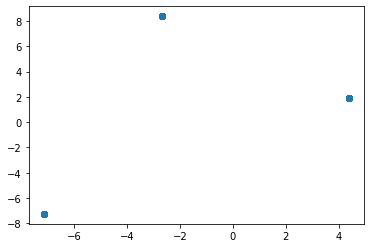

In [15]:
plt.scatter(list_x,list_y)
#axis = figure.add_subplot(1, 3, 3)
#axis.scatter(list_x,list_y)
#plt.show()